In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/data.csv")
data

,chunkSize,fpr,n,absence,presenceMedian,presenceMean,bloomFilterSize
0,64,0.100,500,201,417,414,304
1,64,0.100,1000,233,545,536,600
2,64,0.100,5000,297,833,813,3000
3,64,0.100,10000,329,961,939,5992
4,64,0.010,500,233,729,731,600
5,64,0.010,1000,265,953,947,1200
6,64,0.010,5000,329,1433,1429,5992
7,64,0.010,10000,361,1657,1654,11984
8,64,0.001,500,233,1009,995,904
9,64,0.001,1000,265,1297,1301,1800


In [5]:
np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 64)][data.columns[3]])

0    7.651052
1    7.864186
2    8.214319
3    8.361944
Name: absence, dtype: float64

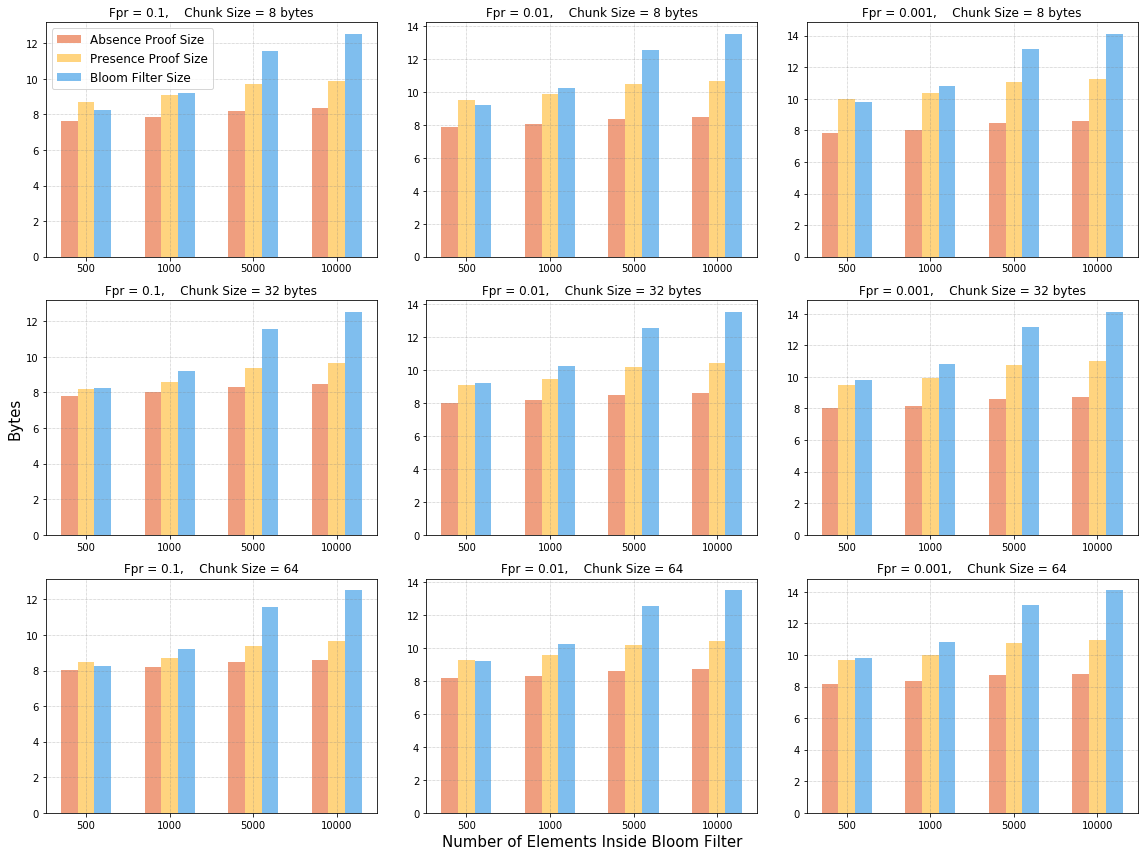

In [8]:
bar_width = 0.2
bar_dist = 0.2
bar_shift = 0.2
opacity = 0.5
n_groups = 4
index = np.arange(n_groups)
bar_widths = [0+bar_width,1+bar_width,2+bar_width,3+bar_width]
a = data.loc[data["fpr"] == 0.001]

fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(3, 3, 1, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.1,    Chunk Size = 8 bytes")
ax2 = fig.add_subplot(3, 3, 2, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.01,    Chunk Size = 8 bytes")
ax3 = fig.add_subplot(3, 3, 3, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.001,    Chunk Size = 8 bytes")

ax4 = fig.add_subplot(3, 3, 4, ylabel= "Bytes",xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.1,    Chunk Size = 32 bytes")
ax5 = fig.add_subplot(3, 3, 5, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.01,    Chunk Size = 32 bytes")
ax6 = fig.add_subplot(3, 3, 6, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.001,    Chunk Size = 32 bytes")

ax7 = fig.add_subplot(3, 3, 7, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.1,    Chunk Size = 64")
ax8 = fig.add_subplot(3, 3, 8, xlabel = "Number of Elements Inside Bloom Filter",xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.01,    Chunk Size = 64")
ax9 = fig.add_subplot(3, 3, 9, xticklabels=a[data.columns[2]].tolist(), xticks= bar_widths, title="Fpr = 0.001,    Chunk Size = 64")



ax1.grid(color='gray', linestyle=':', linewidth=0.5)
ax2.grid(color='gray', linestyle=':', linewidth=0.5)
ax3.grid(color='gray', linestyle=':', linewidth=0.5)
ax4.grid(color='gray', linestyle=':', linewidth=0.5)
ax5.grid(color='gray', linestyle=':', linewidth=0.5)
ax6.grid(color='gray', linestyle=':', linewidth=0.5)
ax7.grid(color='gray', linestyle=':', linewidth=0.5)
ax8.grid(color='gray', linestyle=':', linewidth=0.5)
ax9.grid(color='gray', linestyle=':', linewidth=0.5)

###### First row
bt_absence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 64)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 64)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 64)][data.columns[6]])
rects1 = ax1.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax1.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax1.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 64)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 64)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 64)][data.columns[6]])
rects1 = ax2.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax2.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax2.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 64)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 64)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 64)][data.columns[6]])
rects1 = ax3.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax3.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax3.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

###### Second row
bt_absence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 256)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 256)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 256)][data.columns[6]])
rects1 = ax4.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax4.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax4.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 256)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 256)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 256)][data.columns[6]])
rects1 = ax5.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax5.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax5.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 256)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 256)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 256)][data.columns[6]])
rects1 = ax6.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax6.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax6.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

###### Third row
bt_absence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 512)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 512)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.1) & (data['chunkSize'] == 512)][data.columns[6]])
rects1 = ax7.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax7.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax7.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 512)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 512)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.01) & (data['chunkSize'] == 512)][data.columns[6]])
rects1 = ax8.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax8.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax8.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')

bt_absence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 512)][data.columns[3]])
bt_presence = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 512)][data.columns[4]])
bf = np.log2(data.loc[(data["fpr"] == 0.001) & (data['chunkSize'] == 512)][data.columns[6]])
rects1 = ax9.bar(index - bar_dist + bar_shift, bt_absence, bar_width, alpha=opacity, color='#e03f00', label='Absence Proof Size')
rects2 = ax9.bar(index + bar_shift, bt_presence, bar_width, alpha=opacity, color='#FFAB00', label='Presence Proof Size')
rects3 = ax9.bar(index + bar_dist + bar_shift, bf, bar_width, alpha=opacity, color='#007FDF',label='Bloom Filter Size')




ax1.legend(fontsize=12)

plt.rc('axes', labelsize=15)

plt.tight_layout()
fig.savefig('results/results.pdf', format='pdf')
plt.show()